# Introduction to (data | statistical | mathematical) modeling

This document covers a general introduction to modeling, for the purpose of *inference* and *prediction*.

## Zooming out for a second

We have spent significant time in attempting to collect and understand some datasets.  

**But what about answering the important questions?**

```{figure} ../img/ds-roadmap-cady.png
---
width: 80%
name: ds-roadmap
---
Data Science Roadmap {cite:p}`cady2017data`.
```

```{figure} ../img/data-analytics-df.jpg
---
width: 80%
name: data-analytics-df
---
Types of Data Analytics (DataForest).
```

## What is a model?

A model is a *representation* of a real (physical) system.

### Ball drop example
In one of your physics classes, you may have come across a simple free falling model:

$$ y(t) = - \frac{1}{2} g t^2, \quad v(t) = -g t. $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-colorblind')

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
h = 100  # Initial height (m)
t_total = np.sqrt(2*h/g)  # Total time for the ball to hit the ground (s)

# Time array from 0 to t_total
t = np.linspace(0, t_total, num=500)

# Calculate position and velocity as functions of time
y = - 0.5*g*t**2  # Position as a function of time
v = -g*t  # Velocity as a function of time

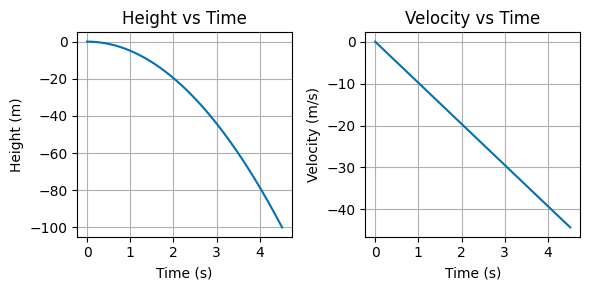

In [2]:
# Plot position and velocity
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(t, y, label='Height')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, v, label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()

**Is this model useful?**

**Is this model accurate in capturing the freefalling behavior? Why and why not?**

**What may be a more realistic model?**

## Why do we build models?

There are three main reasons:

- to explain complex real-world phenomena,  **(interpretation)**
- to predict when there is uncertainty,     **(accuracy)**
- to make causal inference. 

### Examples (some nuclear physics, some epidemiology)

```{figure} ../img/nuclear-even-even.jpg
---
width: 75%
name: even-even
---
Even-even nuclei on the nuclear landscape {cite:p}`erler2012limits`.
```

```{figure} ../img/multiple-models-prediction.png
---
width: 60%
name: multiple-model-predictions
---
Summary of empirical constraints of the nuclear saturation point {cite:p}`drischler2024bayesian`.
```

```{figure} ../img/seir-model.png
---
width: 60%
name: seir-model
---
Example of compartmental model in epidemiology {cite:p}`reyne2022principles`.
```

## Modeling process

Consider this very general model:

$$ y = f(x; \theta) + \varepsilon,  \text{ where}$$

| Notation | Description                        |
|:---------|:-----------------------------------|
|$y$       | output (*or* outcome, response)    |
|$x$       | input (*or* feature, attribute)    |
|$f$       | model                              |
|$\theta$  | model parameter                    |
|$\varepsilon$ | unexplained error              |


**Questions for any model:**
1. How do we choose a model?
2. How do we quantify the unexplained error?
3. How do we choose the parameters (given data)?
4. How do we evaluate if the model is "good"?

### Penguins as an example

```{figure} ../img/penguins.jpg
---
width: 90%
name: penguin
---
Penguin (www.cabq.gov).
```

Consider the `penguins` dataset that has information about 345 penguins.

Perhaps we are interested in the relationship between the length of their flippers and their body mass

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

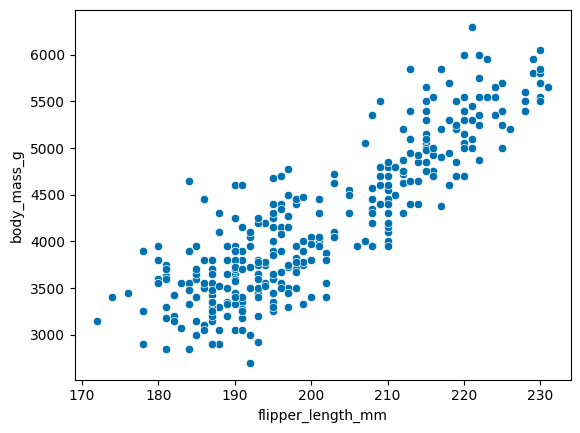

In [3]:
#!pip install seaborn
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset('penguins')
# retain complete data
penguins = penguins[~penguins.isna().any(axis='columns')]

sns.scatterplot(y='body_mass_g', x='flipper_length_mm', data=penguins)

**Penguins**

1. How do we choose a model?

Say we select the following linear model:

$$ y_i = \beta_0 + \beta_1 x_i + \varepsilon_i.$$

2. How do we quantify the unexplained error?

The errors, as a result of the model choice, is

$$ \varepsilon_i = y_i - (\beta_0 + \beta_1 x_i).$$

3. How do we choose the parameters (given data)?

A common way to select the parameters is to minimize errors, specified by a **loss** function.  Loss functions are designed to evaluate how good a parameter is.

For examples, both of the following would be a legitimate loss function, with respect to $\boldsymbol{\beta}$:

$$ \ell_1(\boldsymbol{\beta}) = \sum_{i=1}^n |y_i - (\beta_0 + \beta_1 x_i)|, $$
$$ \ell_2(\boldsymbol{\beta}) = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2. $$

In [4]:
y = penguins.body_mass_g.values
x = penguins.flipper_length_mm.values

def l1_loss(beta, x, y):
    return np.sum(np.abs(y - beta[0] - beta[1]*x))

In [5]:
import numpy as np

beta = np.array((0, 1))  # a "guess"

l1_loss(beta, x, y)

1334028.0

In [6]:
# FILL-IN: write the l2_loss function and return the l2_loss where beta = np.array((0, 1))
def l2_loss():
    return

Under the hood of "fitting":

Given a loss function, the fitting step means to find a set of parameters that minimizes the loss.  Inheritly, it is an optimization.

In [7]:
import scipy

beta0 = beta
l1_opt = scipy.optimize.minimize(l1_loss, beta0, args=(x, y))

In [8]:
l1_opt

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 103608.94055436643
        x: [-5.984e+03  5.060e+01]
      nit: 15
      jac: [-1.000e+00 -2.080e+02]
 hess_inv: [[ 1.082e+01 -5.738e-02]
            [-5.738e-02  3.065e-04]]
     nfev: 210
     njev: 69

In [9]:
# FILL-IN: find the optimal parameters using the l2_loss function.
def l2_loss(beta, x, y):
    return np.sum((y - beta[0] - beta[1]*x)**2)
l2_opt = scipy.optimize.minimize(l2_loss, beta0, args=(x, y))

In [10]:
l2_opt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 51211962.729684055
        x: [-5.872e+03  5.015e+01]
      nit: 6
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 3.113e-01 -1.542e-03]
            [-1.542e-03  7.671e-06]]
     nfev: 33
     njev: 11

In [11]:
# An alternative way to find the optimal parameters with l2_loss.
x_mat = np.array((np.ones(x.shape[0]), x)).T
beta_l2_opt = np.linalg.solve(x_mat.T @ x_mat, x_mat.T @ y)

In [12]:
beta_l2_opt

array([-5872.09268284,    50.15326594])

4. How do we evaluate if the model is "good"?

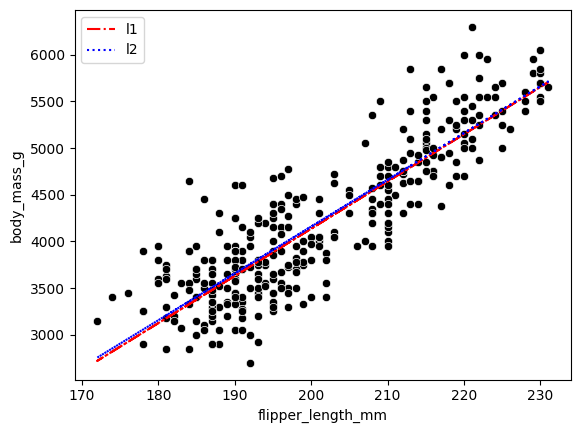

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', color='k', data=penguins, ax=ax)
ax.plot(x, l1_opt.x[0] + l1_opt.x[1] * x, color='red', linestyle='-.', label='l1')
ax.plot(x, l2_opt.x[0] + l2_opt.x[1] * x, color='blue', linestyle=':', label='l2')
plt.legend()

**(Why not) try a constant model?**

$$y_i = \beta_0 + \varepsilon_i.$$

In [14]:
def l1_constant_loss(beta, y):
    return np.sum(np.abs(y - beta))
def l2_constant_loss(beta, y):
    return np.sum((y - beta)**2)
    
l1_constant_opt = scipy.optimize.minimize(l1_constant_loss, 0, args=y)
l2_constant_opt = scipy.optimize.minimize(l2_constant_loss, 0, args=y)

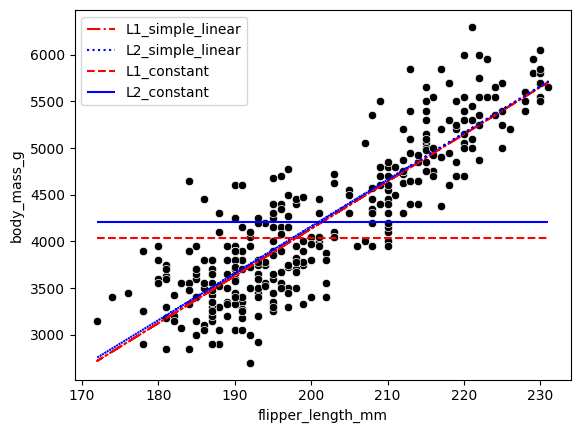

In [15]:
fig, ax = plt.subplots(1, 1)
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', color='k', data=penguins, ax=ax)
ax.plot(x, l1_opt.x[0] + l1_opt.x[1] * x, color='red', linestyle='-.', label='L1_simple_linear')
ax.plot(x, l2_opt.x[0] + l2_opt.x[1] * x, color='blue', linestyle=':', label='L2_simple_linear')
ax.hlines(y=l1_constant_opt.x, xmin=np.min(x), xmax=np.max(x), color='red', linestyle='--', label='L1_constant')
ax.hlines(y=l2_constant_opt.x, xmin=np.min(x), xmax=np.max(x), color='blue', linestyle='-', label='L2_constant')
plt.legend()

**What if we are shown this graph though?**

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

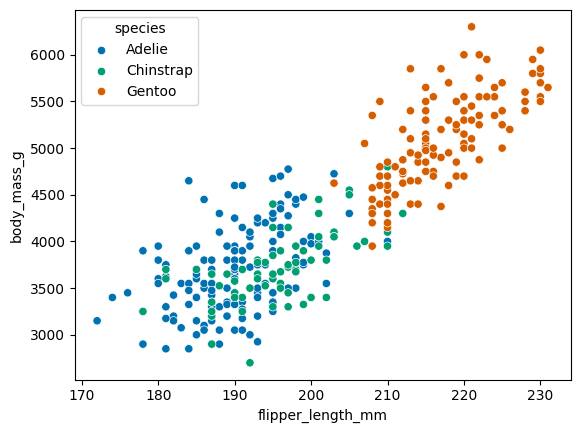

In [16]:
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', hue='species', data=penguins)

In [17]:
# categorial predictor?
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
species_onehot = enc.fit_transform(penguins[['species']]).todense()

$$y_i = \beta_0 + \beta_1 \text{[flipper\_length\_mm]} + \beta_2 \text{[is\_adelie]} + \beta_3 \text{[is\_chinstrap]} + \beta_4 \text{[is\_gentoo]}$$

In [18]:
# Form the design matrix
X = np.array((np.ones(x.shape[0]), x)).T

X = np.column_stack((X, species_onehot))

X = np.array(X)
X

array([[  1., 181.,   1.,   0.,   0.],
       [  1., 186.,   1.,   0.,   0.],
       [  1., 195.,   1.,   0.,   0.],
       ...,
       [  1., 222.,   0.,   0.,   1.],
       [  1., 212.,   0.,   0.,   1.],
       [  1., 213.,   0.,   0.,   1.]])

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)

reg.fit(X, y)

betas = reg.coef_
betas

array([-2990.09713522,    40.60616529, -1023.08175274, -1228.45723258,
        -738.5581499 ])

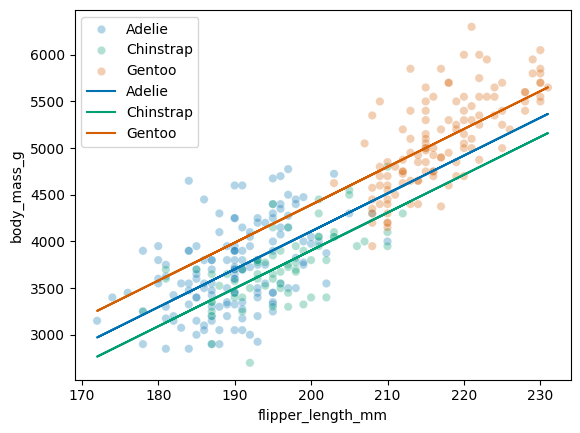

In [20]:
fig, ax = plt.subplots(1, 1)
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', hue='species', data=penguins, alpha=0.3)
for i in range(2, 5):
    ax.plot(x, betas[0] + betas[1]*x + betas[i], label=enc.categories_[0][i-2])
plt.legend()